<a href="https://colab.research.google.com/github/MelKanyi/Week_9_IP/blob/master/Moringa_Data_Science_Core_W9_Independent_Project_2020_Melissa_Kanyi_Python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="yellow"> **Defining the Question**

## <font color="red"> Specifying the Question

- Predict if a passenger survived the sinking of the Titanic or not.
- Predict whether an email is spam or ham.

## <font color="red"> Metric of Success

* Since both projects are classification problems, we will use:
     * Accuracy; threshold 85%
* For target class imbalance we will use 
* (harmonic mean between the positive rate (precision) and the negative rate (Recall))
     * F1 score; threhold 85%

## <font color="red"> Experimental Design Taken

 **Predicting survival in the titanic Disaster**
 * Loading the dataset
 * Exploratory Data Analysis
 * Visualization
 * Data Cleaning
 * Features Engineering
 * Modeling: K-Nearest Neighbors Classifier (KNN)
 * Hyperparameter Tuning
 * Optimization techinques for KNN 
 * Recommendations
 * Challenging the model: Random Forest Classifier
 * Conclusion

## <font color="red"> Appropriateness of the Data

**Dataset 1 links:**
* Train set: [link text](https://www.kaggle.com/c/titanic/download/train.csv)
* Test set:[link text](https://www.kaggle.com/c/titanic/download/test.csv)

The dataset contains the following fields:
* Pclass Ticket class (: 1=upper, 2=middle, 3=lower)
* Sex : Gender
* Age : Age in years (fractional for babies)
* Sibsp : Number of siblings and spouse. Sibling = brother, sister, stepbrother, stepsister.    Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents or children aboard the ship. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number (a string of characters)
* Fare: Passenger fare (dollars)
* Cabin: Cabin number (a string of characters)
* Embarked: Port of embarkation (S=Southampton, Q=Queenstown (now Cobh), C=Cherbourg)

# <font color="yellow"> **Reading the Data**

In [0]:
# Importing necessary libraries
import pandas as pd 
import numpy as np

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn libraries for data preparartion and performance measures
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

# Algorithms
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [24]:
# Loading the train dataset
data = pd.read_csv('train.csv')
data  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [25]:
# Loading the test dataset
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


> We will not be using the test dataset because it does not have out dependent variable. 

In [26]:
# checking the top of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
# checking the bottom of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the table above: 

1. We need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.

2. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. 

3. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.


In [28]:
# view summary information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
# checking for unique values 

cols = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for col in cols:
  print(col)
  print(data[col].unique())
  print('\n')

Pclass
[3 1 2]


Sex
['male' 'female']


SibSp
[1 0 3 4 2 5 8]


Parch
[0 1 2 5 3 4 6]


Embarked
['S' 'C' 'Q' nan]




In [30]:

# Statistical description of numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the dataset survived the Titanic.

We can also see that the passenger ages range from 0.4 to 80.

On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

* It is clear that people from the First class had higher chances of survival.
* Pclass is therefore an important feature to predict survival

* Survival chance of women are higher between 14 and 40
* Men have a high probability of survival when they are between 18 and 30 years old.
* In both generally infants have a little bit of higher chances of survival.
* Certain ages hava increased odds of survival.
* Creating age groups in our feature engineering may help to make every feature of the same scale.

# <font color="yellow"> **Data Cleaning** 

## <font color = red> Cleaning the Train Dataset

In [36]:
# checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Which features are:

1. **Categorical ?**
- Survived
- Sex
- Embarked

2. **Ordinal?**
- Pclass.

3. **Numerical?**
- Age (Continuous)
- Fare (Continuous)
- SibSp (Discrete)
- Parch (Discrete)

In [0]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
numeric = ['Age', 'Fare', 'SibSp', 'Parch']

categoricals = ['Survived','Pclass','Sex','Embarked']

objects = ['Name']

for x in data.columns:
   if x in numeric:
       data[x]=pd.to_numeric(data[x])
   elif x in categoricals:
        data[x]=data[x].astype('category')

In [38]:
#Check if features are assigned the relevant data types
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [39]:
# checking for missing values 
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [40]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Embarked feature has only 2 missing values, which can easily be filled by mode.

It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values.

The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [0]:
# replacing all missing values with the mean in the age column
data['Age'].fillna((data['Age'].mean()), inplace = True)

In [42]:
# confirming changes
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Embarked column has 2 missing values. It's best to fill them with the most common values in that column to maintain its frequency distribution.

In [0]:
#Replace the null values in the Embarked column with the mode

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [44]:
# confirming changes
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [0]:
# column cabin containing categorical values 
# dropping the columns since it contains very many missing values
data.drop('Cabin', axis = 1, inplace = True)

In [0]:
# dropping the unnecessary columns
data.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [47]:
# confirming changes
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [48]:
# checking if the data set contains duplicates
data.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [0]:
# droping the duplicated values 
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

In [50]:
# checking if the data set contains duplicates
data.duplicated(subset = None, keep = 'first')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

# <font color="yellow"> **Exploratory Data Analysis**

Plot a Correlation Matrix to establish the significance among features

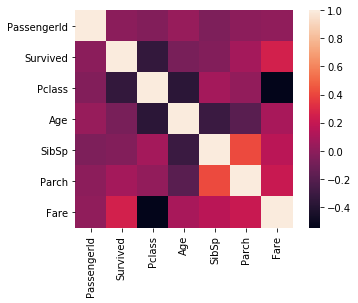

In [31]:
corr = data.corr()

ax = sns.heatmap(corr,square=True)

In [32]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

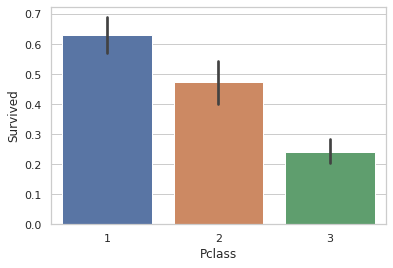

In [33]:
# Using a bar chart from seaborn
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=data)

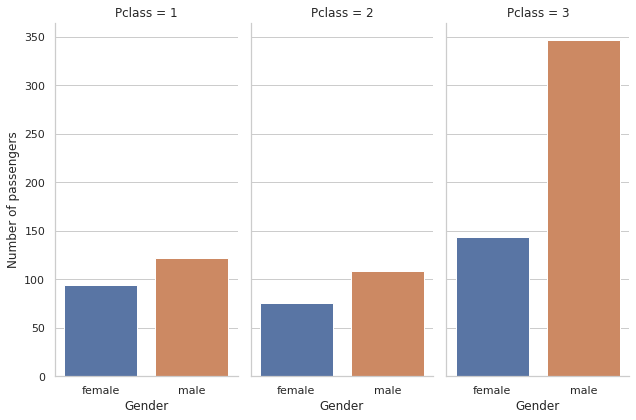

In [34]:

sex = pd.DataFrame({'count': data.groupby(['Pclass','Sex']).size()}).reset_index()
# sns.barplot(x = 'Pclass', y = 'count', hue = 'Sex', data = sex)
g = sns.catplot(x = 'Sex', y = 'count',
           col = 'Pclass', data = sex,
           kind = 'bar', aspect = 0.5, height = 6)
g.set_axis_labels('Gender', 'Number of passengers')
plt.show()

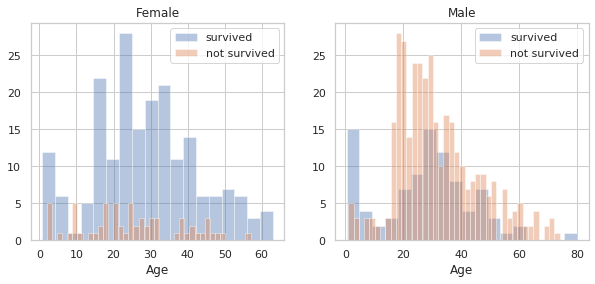

In [35]:
# Using Histograms to compare age and sex and their contribution to survival of a person
# Plot using seaborn
sns.set(style = 'whitegrid', context = 'notebook')
# First we create variables labeling the survived column values 0 and 1
survived = 'survived'
not_survived = 'not survived'


# creating a chart where our plots will appear
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

# creating women and male variables from the male and female variables in the dataset
women = data[data['Sex']=='female']
men = data[data['Sex']=='male']

# Plotting the histogram of the women and specifying the bin sizes, and labels as we created earlier

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

# Plotting the histogram of the men and specifying the bin sizes, and labels as we created earlier
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
plt.show()


# <font color = "Yellow"> **Feature Engineering**

As was stated earlier women, children and the upper class were given priority to get to safety, we therefore have to establish the title of the passengers, the size of a family or whether the passenger was onboard alone.

It is difficult to establish any information on a passenger based on their names, some are nicknames. So we try establish the title of each passenger.

In [0]:
#Let's establish the title of each passenger

for x in data:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [52]:
#What are the titles extracted from the names ?

data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

The titles are many in number and usually we just need to establish if it's a Miss, Mrs, Mr or Master and every other title can be referred to as 'other'.

In [0]:
for x in data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [54]:
#What are the titles extracted from the names?

data.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

Now we can safely drop the Name column.

In [0]:
# dropping the name column
data.drop('Name', axis=1, inplace = True)

In [56]:
# confirming changes
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs


We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [0]:
for x in data:
    data['FamSize'] = data['SibSp'] + data['Parch'] + 1

In [58]:
# confirming changes
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize
0,0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2


Was the passenger traveling alone or with a family? If the family size is 1 then they are probably alone, if there are more then the passenger is essentially not alone.

In [0]:
for x in data:
    data['Alone?'] = 0
    data.loc[data['FamSize'] == 1, 'Alone?'] = 1

In [60]:
data['Alone?'].unique()

array([0, 1])

Essentially;

if Alone = 0, they are not alone

if Alone = 1, they are alone.

In [61]:
data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamSize,Alone?
0,0,3,male,22.0,1,0,7.25,S,Mr,2,0



Thereafter we can drop the colums 'SibSp','Parch' and 'FamSize'

In [0]:
data = data.drop(['Parch', 'SibSp', 'FamSize'], axis=1)

In [63]:
data.head(1)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Alone?
0,0,3,male,22.0,7.25,S,Mr,0


In [0]:
categoricals = ['Sex','Embarked','Title']

data = pd.get_dummies(data, columns=['Sex','Embarked','Title'])

In [65]:
data.head(2)

,Survived,Pclass,Age,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,0,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,0,1,0,1,0,0,0,0,0,1,0


We must consider the age column, if a passenger was a child they had a higher chance of survival, therefore we must categorize a passenger as adult(1) or child(0) in a new Adult column.

In [66]:
data["Adult"] = 0

data["Adult"][data["Age"] >= 18] = 1

#Thereafter drop the age column

data = data.drop(['Age'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
data = data[['Pclass','Adult','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other','Survived']]
data.head()

,Pclass,Adult,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Survived
0,3,1,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,1,1,71.2833,0,1,0,1,0,0,0,0,0,1,0,1
2,3,1,7.9250,1,1,0,0,0,1,0,1,0,0,0,1
3,1,1,53.1000,0,1,0,0,0,1,0,0,0,1,0,1
4,3,1,8.0500,1,0,1,0,0,1,0,0,1,0,0,0


# <font color = yellow> **Question 1**

## <font color = "red"> K-Nearest Neighbors 

In [0]:
# split into train and test sets
# define our X and y

X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [0]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.2,random_state = 42)

In [70]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (712, 14)
Shape of the y_train:  (712,)
Shape of the X_test:  (179, 14)
Shape of the y_test:  (179,)


In [71]:
#Perform the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[87 18]
 [20 54]]
The accuracy : 0.7877094972067039


Let us repeat the step using 70% training data and 30% test data.

In [0]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.3,random_state = 42)

In [73]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (623, 14)
Shape of the y_train:  (623,)
Shape of the X_test:  (268, 14)
Shape of the y_test:  (268,)


In [74]:
#Perform the K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.77      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

[[133  24]
 [ 30  81]]
The accuracy : 0.7985074626865671


Let's use 60% training data and 40% test data.

In [0]:
# train and test splits
X_train, X_test,y_train,y_test = train_test_split (X,y,test_size = 0.4,random_state = 42)

In [76]:
print("Shape of the X_train: ", X_train.shape)
print("Shape of the y_train: ", y_train.shape)
print("Shape of the X_test: ", X_test.shape)
print("Shape of the y_test: ", y_test.shape)

Shape of the X_train:  (534, 14)
Shape of the y_train:  (534,)
Shape of the X_test:  (357, 14)
Shape of the y_test:  (357,)


In [77]:
#Perform the K-Nearest Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Summary of the predictions made by the classifier

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Accuracy score

print('The accuracy :',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       216
           1       0.76      0.69      0.72       141

    accuracy                           0.79       357
   macro avg       0.78      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357

[[185  31]
 [ 44  97]]
The accuracy : 0.7899159663865546


### <font color = cyan> Hyperparameter Tuning

Parameters to tune in KNN

* k's
* Distance Metric
* Weights

### <font color = cyan> Optimize the K-Nearest Neighbors Classifier

we can optimize KNN by:
* Dimensionality Reduction with Linear Discriminant Analysis
* Rescaling our data which makes the distance metric more meaningful. 
* Changing the distance **metric** for different applications.
* Implementing weighted voting
* Applying appropriate nearest-neighbor techniques

In [78]:
# Splitting the data into features and target variable

X = data.iloc[:, :-1]
y = data.iloc[:,-1]


# Splitting the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,10),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5, random_state = 10)  # specifying number of folds for cross validation
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}

Using the Best parameters to assess the best split KNN model (80,20)

In [79]:
# Splitting the data into features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


# scaling our Data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Reducing the dimensions in our dataset
# Specifying the number of components
lda = LDA(n_components=7)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'euclidean', n_neighbors= 9, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.8212290502793296


[[101  16]
 [ 16  46]]


              precision    recall  f1-score   support

           0       0.86      0.86      0.86       117
           1       0.74      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(14, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* There is great improvement in our tuned model.
* The wrongly classified classes actually reduced significantly.
* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 104 passengers were correctly classified as not survived (called true negatives) 
     * 13 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 17 passengers where wrongly classified as survived (false negatives) and
     * 45 were correctly classified as survived (true positives).
     
* The F1 score = 87%, Recall= 89% & Precision = 86% also improved greatly
* Our model predicts 86% of the time, a passengers survival correctly (precision).
* The recall tells us that it predicted the survival of 89% of the people who actually survived.

Predict the scores using KNearestNeighbors (KNN) with GridSearchCV

In [0]:
model = KNeighborsClassifier()
k_range = list(range(1,10))
weights_options = ['uniform','distance']
k_grid = dict(n_neighbors=k_range, weights = weights_options)
grid = GridSearchCV(model, k_grid, cv=10, scoring = 'precision')
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [0]:
grid.cv_results_

{'mean_fit_time': array([0.00490344, 0.00392129, 0.00389423, 0.0039592 , 0.00380168,
        0.00394795, 0.00405011, 0.00383685, 0.0038553 , 0.00369191,
        0.00385966, 0.00413589, 0.00443096, 0.00384734, 0.0039923 ,
        0.00382383, 0.00439386, 0.00438299]),
 'mean_score_time': array([0.00531802, 0.00339224, 0.00494053, 0.0034229 , 0.00479765,
        0.00339794, 0.00535688, 0.00331664, 0.00495872, 0.00318084,
        0.00494077, 0.00345004, 0.00550382, 0.00328739, 0.00495901,
        0.00324695, 0.00564256, 0.00375152]),
 'mean_test_score': array([0.65216554, 0.65216554, 0.77953439, 0.72162013, 0.72393717,
        0.71634173, 0.73675824, 0.71251534, 0.71175813, 0.70841767,
        0.73478167, 0.716566  , 0.67244579, 0.72286282, 0.69593048,
        0.70293054, 0.63389086, 0.67475758]),
 'param_n_neighbors': masked_array(data=[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [0]:
print ("Best Score: ",str(grid.best_score_))

Best Score:  0.779534387181446


In [0]:
print ("Best Parameters: ",str(grid.best_params_))

Best Parameters:  {'n_neighbors': 2, 'weights': 'uniform'}


In [0]:
print ("Best Estimators: ",str(grid.best_estimator_))

Best Estimators:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')


In [0]:
#Predict scores

y_pred = grid.predict(X_test)

In [0]:
#Calculate Accuracy

print('The accuracy :',accuracy_score(y_pred,y_test))

The accuracy : 0.7535014005602241


In [0]:
# Calculate precision, recall, and fbeta_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       216
           1       0.80      0.50      0.61       141

    accuracy                           0.75       357
   macro avg       0.77      0.71      0.72       357
weighted avg       0.76      0.75      0.74       357



A larger dataset would result in a higher level of accuracy.

## <font color = red> Challenging the solution 

### <font color = cyan> Cleaning the Test Dataset

In [0]:
# checking data types
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
#Convert the relevant data types to categorical

# Creating a list of the numerical columns in the dataset.
numeric = ['Age', 'Fare', 'SibSp', 'Parch']

categoricals = ['Pclass','Sex','Embarked']

objects = ['Name']

for x in test.columns:
   if x in numeric:
       test[x]=pd.to_numeric(test[x])
   elif x in categoricals:
        test[x]=test[x].astype('category')

In [0]:
test.dtypes

PassengerId       int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [0]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [0]:
# replacing all missing values with the mean in the age column
test['Age'].fillna((test['Age'].mean()), inplace = True)

In [0]:
# column cabin containing categorical values 
# dropping the columns since it contains very many missing values
test.drop('Cabin', axis = 1, inplace = True)

In [0]:
#Replace the null values in the Embarked column with the mode

test['Fare'].fillna(test['Fare'].mode()[0], inplace = True)

In [0]:
# dropping the unnecessary columns
test.drop(['PassengerId', 'Ticket'], axis = 1, inplace = True)

In [0]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### <font color = cyan> Feature Engineering for Test Set

In [0]:
#Let's establish the title of each passenger

for x in test:
    test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [0]:
#What are the titles extracted from the names ?
test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [0]:
for x in test:
    test['Title'] = test['Title'].replace(['Col', 'Dr', 'Rev', 'Sir', 'Dona'], 'Other')

    test['Title'] = test['Title'].replace('Mlle', 'Miss')
    test['Title'] = test['Title'].replace('Ms', 'Miss')
    test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [0]:
#What are the titles extracted from the names?

test.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [0]:
# dropping the name column
test.drop('Name', axis=1, inplace = True)

In [0]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,34.5,0,0,7.8292,Q,Mr
1,3,female,47.0,1,0,7.0000,S,Mrs


In [0]:
for x in test:
    test['FamSize'] = test['SibSp'] + test['Parch'] + 1

In [0]:
for x in test:
    test['Alone?'] = 0
    test.loc[test['FamSize'] == 1, 'Alone?'] = 1

In [0]:
test['Alone?'].unique()

array([1, 0])

In [0]:
test = test.drop(['Parch', 'SibSp', 'FamSize'], axis=1)

In [0]:
categoricals = ['Sex','Embarked','Title']

test = pd.get_dummies(test, columns=['Sex','Embarked','Title'])

In [0]:
test.head(4)

,Pclass,Age,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,1,0,1,0,1,0,0,0,1,0,0
1,3,47.0,7.0000,0,1,0,0,0,1,0,0,0,1,0
2,2,62.0,9.6875,1,0,1,0,1,0,0,0,1,0,0
3,3,27.0,8.6625,1,0,1,0,0,1,0,0,1,0,0


In [0]:
test["Adult"] = 0

test["Adult"][test["Age"] >= 18] = 1

#Thereafter drop the age column

test = test.drop(['Age'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
test.columns

Index(['Pclass', 'Fare', 'Alone?', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Adult'],
      dtype='object')

In [0]:
test = test[['Pclass','Adult','Fare','Alone?','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Other']]
test.head()

,Pclass,Adult,Fare,Alone?,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,7.8292,1,0,1,0,1,0,0,0,1,0,0
1,3,1,7.0000,0,1,0,0,0,1,0,0,0,1,0
2,2,1,9.6875,1,0,1,0,1,0,0,0,1,0,0
3,3,1,8.6625,1,0,1,0,0,1,0,0,1,0,0
4,3,1,12.2875,0,1,0,0,0,1,0,0,0,1,0


### <font color = cyan> Random Forest Classifier

* Using Random Forest which is an Ensemble algorithm.
* Also considering the Train data without splitting it further.

In [0]:
# Splitting the data into test and train sets as provided earlier
# NOTE: No further split is done.

X_train = data.iloc[:, :-1]
y_train = data.iloc[:,-1]
X_test = test.copy()

# Instantiating our model
# Training the model
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=10,
                                       n_jobs=-1) #  Whether to use out-of-bag samples to estimate the generalization accuracy.
random_forest.fit(X_train, y_train)

# Making predictions
y_prediction = random_forest.predict(X_test)

# Evaluating the model
random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

# Generating cross-validated estimates for each input data point
predictions = cross_val_predict(random_forest, X_train, y_train, cv=3)


print(confusion_matrix(y_train, predictions))
print(classification_report(y_train, predictions))

88.89 %
[[479  70]
 [ 94 248]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       549
           1       0.78      0.73      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.81      0.82      0.81       891



* The Random Forest Classifier model yields 89% accuracy.

* This is a better model compared to KNN.
* However, tunning may be needed to assess the model adequately.

* The Recall score increased compared to other models.

* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 479 passengers were correctly classified as not survived (called true negatives) 
     * 70 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 94 passengers where wrongly classified as survived (false negatives) and
     * 248 were correctly classified as survived (true positives).
     

## <font color = red> Recommendation

**From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.**

## <font color = red> Conclusion


* From the analysis: Tuning and Optimizing the KNN model is highly recommended to improve the performance of the model.
* Splitting the data into 70,30 train and test sets was the best in the Titanic dataset.

# <font color = yellow> **Question 2**

## <font color = red> Loading the dataset

In [4]:
spam = pd.read_csv('spambase.data')
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [0]:
# Define the column names
spam.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

In [6]:
# previewing the top of the dataset
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [7]:
#previewing the bottom of the dataset
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [8]:
# checking the summary statistics of our dataset
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

The dataset has too many columns to analyse manually.
we really need reduction methods here to find the most important features.

In [9]:
# checking summary information about our dataset
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
word_freq_make                4600 non-null float64
word_freq_address             4600 non-null float64
word_freq_all                 4600 non-null float64
word_freq_3d                  4600 non-null float64
word_freq_our                 4600 non-null float64
word_freq_over                4600 non-null float64
word_freq_remove              4600 non-null float64
word_freq_internet            4600 non-null float64
word_freq_order               4600 non-null float64
word_freq_mail                4600 non-null float64
word_freq_receive             4600 non-null float64
word_freq_will                4600 non-null float64
word_freq_people              4600 non-null float64
word_freq_report              4600 non-null float64
word_freq_addresses           4600 non-null float64
word_freq_free                4600 non-null float64
word_freq_business            4600 non-null float64
word_freq

In [10]:
spam.shape

(4600, 58)

In [11]:
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

* The data has 4600 rows and 58 columns
* We have no missing values
* The columns are too many and we need to used reduction methods to reduce the data dimension.
* We will go straight to modelling since even making charts can't help in analysing the columns.
* We will plot the target variable though.

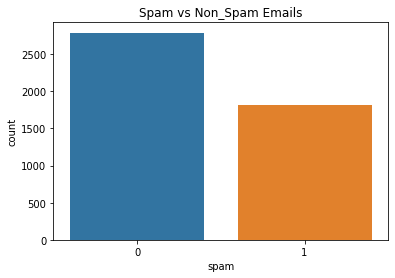

In [12]:
# Plotting the target variable 
# using seaborn

sns.countplot(spam.spam)
plt.title('Spam vs Non_Spam Emails')
plt.show()

## <font color = red> Naives Bayes Classifier
Perform classification of the testing set samples using the Naive Bayes Classifier.

* The Naive Bayes Classifier is a statistical classification technique based on the Bayes Theorem. 

* It has high accuracy and speed on large datasets.

* This type of classifier takes into account the assumption that the effect of a particular feature in a class is independent of other features.


In [0]:
# Create correlation matrix
corr_matrix = spam.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the highly correlated features 
spam.drop(spam[to_drop], axis=1, inplace = True)

In [16]:
# checking if there are any correlated features
to_drop

['word_freq_415']



No columns were dropped since there are no correlated features. we will use PCA and LDA to reduce the data dimension


Splitting the Spam data into 80, 20 train and test sizes.

In [19]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9032608695652173


[[513  25]
 [ 64 318]]


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.93      0.83      0.88       382

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.90      0.90      0.90       920



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 80,20 split model yielded 90.3% accuracy.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 513 emails were correctly classified as Ham (called true negatives) 
     * 25 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 64 emails where wrongly classified as spam (false negatives) and
     * 318 were correctly classified as Spam (true positives).
     
* In this classification we value the Recall so much. 
* The Recall is 95% which means that this is good model.
* Recall is the ability of a model to find all the relevant cases within a dataset.
* It is also called sensitivity

In [20]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9036231884057971


[[789  33]
 [100 458]]


              precision    recall  f1-score   support

           0       0.89      0.96      0.92       822
           1       0.93      0.82      0.87       558

    accuracy                           0.90      1380
   macro avg       0.91      0.89      0.90      1380
weighted avg       0.91      0.90      0.90      1380



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 70,30 split model also yielded 90.3% accuracy.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 789 emails were correctly classified as Ham (called true negatives) 
     * 33 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 100 emails where wrongly classified as spam (false negatives) and
     * 458 were correctly classified as Spam (true positives).
     
* The recall improved slightly from 95% in the previous model to 96%. 

In [21]:
# Fitting the Naives Bayes Classifier: GausssianNB since the features are continuous
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9081521739130435


[[1060   37]
 [ 132  611]]


              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1097
           1       0.94      0.82      0.88       743

    accuracy                           0.91      1840
   macro avg       0.92      0.89      0.90      1840
weighted avg       0.91      0.91      0.91      1840



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The 60,40 split model yielded 90.8% accuracy
* This is a slight improvement compared to the previous split models.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 1060 emails were correctly classified as Ham (called true negatives) 
     * 37 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 132 emails where wrongly classified as spam (false negatives) and
     * 611 were correctly classified as Spam (true positives)..
     
* Again here the recall increased to 97%.

### <font color = cyan> Optimizing Naive Bayes

Improving the performance of the Naive Bayes classifier:
 * Normalizing our data
 * Remove Redundant/ correlated features
 * Apply smoothing techniques; If our dataset has zero frequency issue, we can apply smoothing techniques such as "Laplace Correction" to predict the class of the test data set.


We have already applied the first techniques in our models which was relevant in this scenario.

## <font color = red> Challenging the Solution

In [22]:
# Fitting the Support Vector Classifier
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

# transform = Normalizer()
# X = transform.transform(X)

# X = normalize(X, norm = 'l2')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 0)

sc = StandardScaler(with_std = False, with_mean = False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# pca = PCA(n_components = 1)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

lda = LDA(n_components=10)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

svc = SVC(C=0.1, gamma=0.001, kernel = 'linear')

model = svc.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.9228260869565217


[[1043   54]
 [  88  655]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1097
           1       0.92      0.88      0.90       743

    accuracy                           0.92      1840
   macro avg       0.92      0.92      0.92      1840
weighted avg       0.92      0.92      0.92      1840



/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(56, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


* The Support Vector Machine model yielded 92.2% accuracy.
* This is a great improvement compared to the Naive Bayes Gaussian models.
* Interpreting the confusion matrix;
* The first row is about the non-spam-predictions:
     * 10 emails were correctly classified as Ham (called true negatives) 
     * 54 were wrongly classified as ham (false positives).
* The second row is about the spam-predictions: 
     * 88 emails where wrongly classified as spam (false negatives) and
     * 655 were correctly classified as Spam (true positives)..
     
* Again here the recall increased to 95%.
* This is slight reduction.
* Though the accuracy improved.

## <font color = red> Recommendation

* Normalizing or standardizing the features works greatly to improve the classifier.
* For the spam detection challenge project, using the Standard Scaler yielded the best results.
* Also, using the linear discriminant analysis for dimension reduction yields beter results compared to PCA.
* Lastly increasing the test size in the spam dataset imporved both the accuracy and the Recall.

## <font color = red> Conclusion

* The Gaussian NB is the best model since it yielded both the best Accuracy and Recall scores.
* Optimizing the model is very essential:
    1. Scaling or normalizing the features
    2. Reducing the data dimensions
    3. Increasing the test size for a large dataset.